

---



### First of all, it is better for us to import all libraries we might need to use possibly!

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
pip install hazm

###Then we need to download the dataset from the given link through the command below:

In [ ]:
!gdown  --id '1D3yt99D0GcCRCbdKbUQGxbqjkeh91hTg'

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1D3yt99D0GcCRCbdKbUQGxbqjkeh91hTg
From (redirected): https://drive.google.com/uc?id=1D3yt99D0GcCRCbdKbUQGxbqjkeh91hTg&confirm=t&uuid=285ac03e-aff1-4339-9e05-ffe69c589410
To: /content/hamshahri.rar
100% 873M/873M [00:07<00:00, 117MB/s]


###And then we need to extract it as follows:

In [ ]:
!unrar e hamshahri.rar


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from hamshahri.rar


Would you like to replace the existing file ar.JPG
  1114 bytes, modified on 2008-05-04 12:51
with a new one
  1114 bytes, modified on 2008-05-04 12:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Y

Extracting  ar.JPG                                                         0%  OK 

Would you like to replace the existing file ar.psd
 30316 bytes, modified on 2008-05-04 12:51
with a new one
 30316 bytes, modified on 2008-05-04 12:51

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 
User break

User break


In [ ]:
! unzip /content/Hamshahri-Corpus.zip

Archive:  /content/Hamshahri-Corpus.zip
replace Hamshahri-Corpus.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### our target file is Hamshahri-Corpus.txt, we make sure we have the right file by checking frist lines of it  

In [ ]:
!head -n 50 /content/Hamshahri-Corpus.txt

.DID	1S1
.Date	75\04\02
.Cat	adabh
جاودانگي در زندگي گروهي از طريق هنر 
نگاهي به نمايشگاه آثار هنري احمد طباطبايي 
موضوع آثار طباطبايي مورچگان هستند ولي در باطن چنين ظاهري، اين 
انسانهاهستند كه در هيبتي حشره گونه در تابلوهاي نقاشي نمايشگر 
گوشه هايي از زندگي خود هستند. 
مورچه اي را ديده ايم كه بار سنگين خودرا به دوش مي كشد و در بين راه 
خسته مي شود يا در نتيجه پيش آمدن يك حادثه اتفاقي بار از دستش رها 
شده و براي گريز از خطر آن را مي گذارد و فرار مي كند. اما ساعتي بعد 
به همان نقطه برمي گردد و بار را دوباره به دوش كشيده نفس زنان و 
عرق ريزان آن را به منزل او مي رساند مي داند كه اگر در ميان راه از 
بين رفت، يك مورچه ديگر با همان استعداد غريزه عملي را كه او شروع 
كرده به پايان مي رساند. پس او مي داند كه بعد از خودش نسل آينده اي 
وجود دارد كه بايد از مزاياي آن استفاده نمايد. چه داستان درازي، 
انتها و پاياني هم ميليونها ندارد سال گذشته، ميلياردها سال ديگر 
خواهد گذشت وهمين برنامه ميليونها بار ديگر تجديد مي شود. پس بايد گفت 
سير حيات و تكامل پايان ناپذير است. اسرار جهان پاياني ندارد. پس 
اگر

### We read the txt file by the below command and store it in the Colab env.

In [ ]:
my_file = open ('/content/Hamshahri-Corpus.txt', 'r').read()

In [ ]:
# len(my_file)

## Preprocessing Begins

### We can split the txt file by .DID seperator as a first preprcessing step, it helps us clean our data recongnize the single data objects!

In [ ]:
splitted_text = my_file.split('.DID')

### Now we have a splitted text file

In [ ]:
len(splitted_text)

165226

In [ ]:
# print(splitted_file[1])

### We need to drop the first element of the file which is a None

In [ ]:
splitted_text[0]

''

In [ ]:
del splitted_text[0]

In [ ]:
splitted_text[0]

'\t1S1\n.Date\t75\\04\\02\n.Cat\tadabh\nجاودانگي در زندگي گروهي از طريق هنر \nنگاهي به نمايشگاه آثار هنري احمد طباطبايي \nموضوع آثار طباطبايي مورچگان هستند ولي در باطن چنين ظاهري، اين \nانسانهاهستند كه در هيبتي حشره گونه در تابلوهاي نقاشي نمايشگر \nگوشه هايي از زندگي خود هستند. \nمورچه اي را ديده ايم كه بار سنگين خودرا به دوش مي كشد و در بين راه \nخسته مي شود يا در نتيجه پيش آمدن يك حادثه اتفاقي بار از دستش رها \nشده و براي گريز از خطر آن را مي گذارد و فرار مي كند. اما ساعتي بعد \nبه همان نقطه برمي گردد و بار را دوباره به دوش كشيده نفس زنان و \nعرق ريزان آن را به منزل او مي رساند مي داند كه اگر در ميان راه از \nبين رفت، يك مورچه ديگر با همان استعداد غريزه عملي را كه او شروع \nكرده به پايان مي رساند. پس او مي داند كه بعد از خودش نسل آينده اي \nوجود دارد كه بايد از مزاياي آن استفاده نمايد. چه داستان درازي، \nانتها و پاياني هم ميليونها ندارد سال گذشته، ميلياردها سال ديگر \nخواهد گذشت وهمين برنامه ميليونها بار ديگر تجديد مي شود. پس بايد گفت \nسير حيات و تكامل پايان ناپذير است. اسرار جهان پ

In [ ]:
# test = splitted_text[0].split('\n')
# passage = test[3:]
# passage  = ' '.join(passage)

### By splitting the file regarding to '\\n' we can process the file as a list

### Then we can iterate over the list and extract the date, categroy and the text content of each data object by using a for loop and split method as follows

In [ ]:
dic = {}
for i in range(len(splitted_text)):
  test = splitted_text[i].split('\n')
  date = test[1].split('\t')[1]
  cat  = test[2].split('\t')[1]
  content = ' '.join(test[3:])
  # content = normalizer.normalize(content)
  dic[i] = [date, cat, content]


In [ ]:
import pandas as pd

In [ ]:
df = pd.DataFrame(dic)

In [ ]:
df2 = df.transpose()
df2.columns = ['Date', 'Category', 'Content']
df2.head()

,Date,Category,Content
0,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...
1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...
2,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه ط...
3,75\04\02,ejtem,بازي را جدي بگيريم مطالعه اي مقدماتي پيرامون ...
4,75\04\02,elmfa,تخته سياه و غباري كه سترده نمي شود... اشاره; ...


In [ ]:
df2.shape

(165225, 3)

### So we have 165225 data object, each of them showing one article.

## Visualization

# Pie Chart for category

In [ ]:
df2['Category'].value_counts()

Category
siasi      17530
eqtes      16661
kharj      14666
akhar      13811
vrzsh      13011
           ...  
Musical        3
igozar         3
Cinew          3
Polig          2
Thought        2
Name: count, Length: 105, dtype: int64

Text(0.5, 1.0, 'Pie Chart')

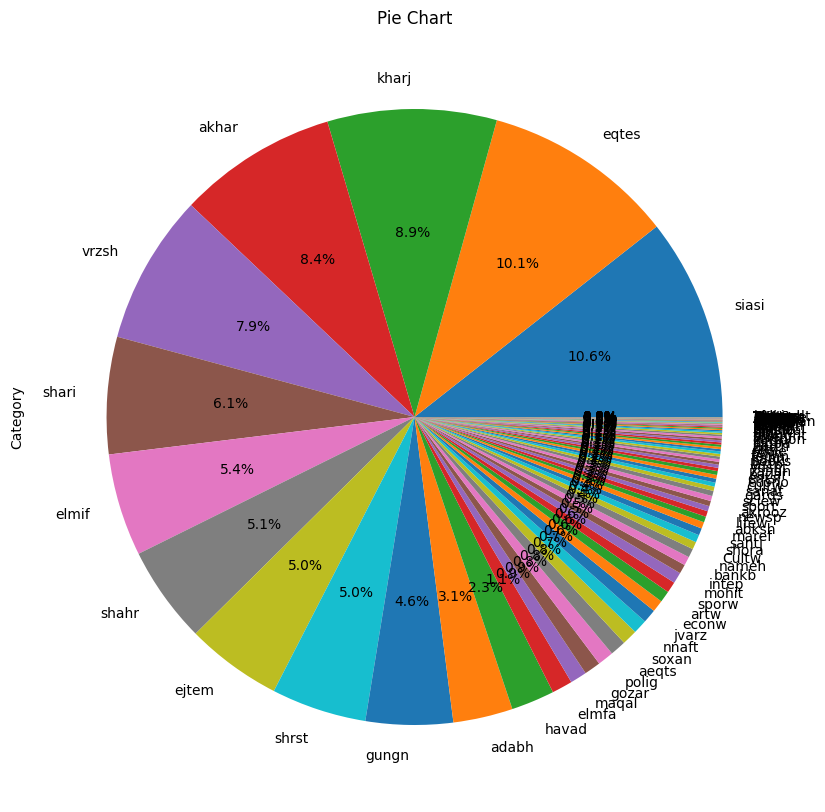

In [ ]:
plt.figure(figsize= (15, 10))
df2['Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Pie Chart')

### The above pi chart shows the frequncy of each category
### Categories siasi, eqtesadi, khareji and akhar are the most commone one in the data set.

In [ ]:
df2['Date'].value_counts()

81\02\05    168
81\03\21    157
81\05\08    154
81\02\30    151
81\03\16    149
           ... 
77\09\21     45
77\06\17     42
77\11\14     42
80\08\03     42
80\08\05     25
Name: Date, Length: 1927, dtype: int64

In [ ]:
Date = df2['Date']
Date2 = Date.to_list()
year_list = []
month_list = []
day_list = []

for i in Date2:
  j = i.split('\\')
  year = j[0]
  year_list.append(year)
  month = j[1]
  month_list.append(month)
  day = j[2]
  day_list.append(day)


#Plot of the years

Text(0.5, 0, 'Year')

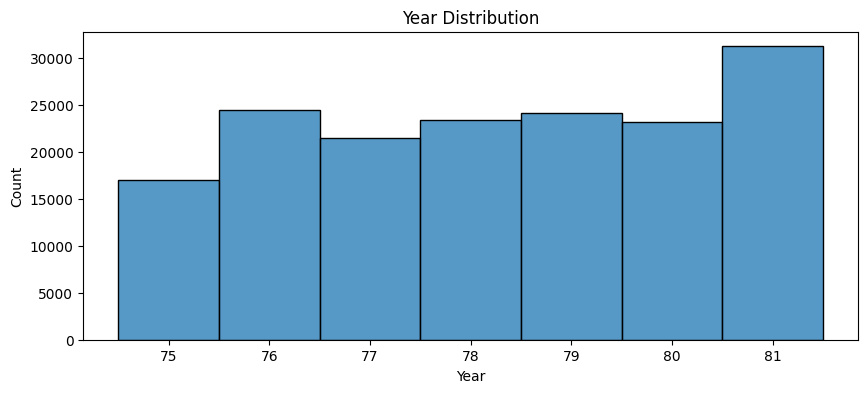

In [ ]:
plt.figure(figsize= (10, 4))
sns.histplot(year_list)
plt.title('Year Distribution')
plt.xlabel('Year')

#plot of the months

Text(0.5, 0, 'Month')

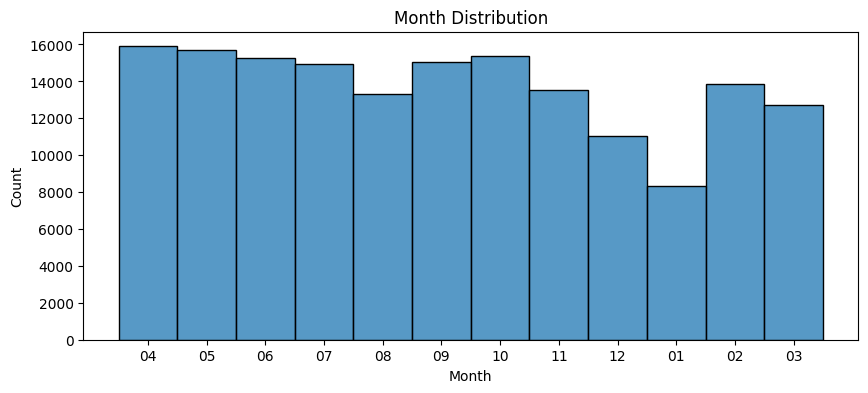

In [ ]:
plt.figure(figsize= (10, 4))
sns.histplot(month_list)
plt.title('Month Distribution')
plt.xlabel('Month')

Text(0.5, 0, 'Day')

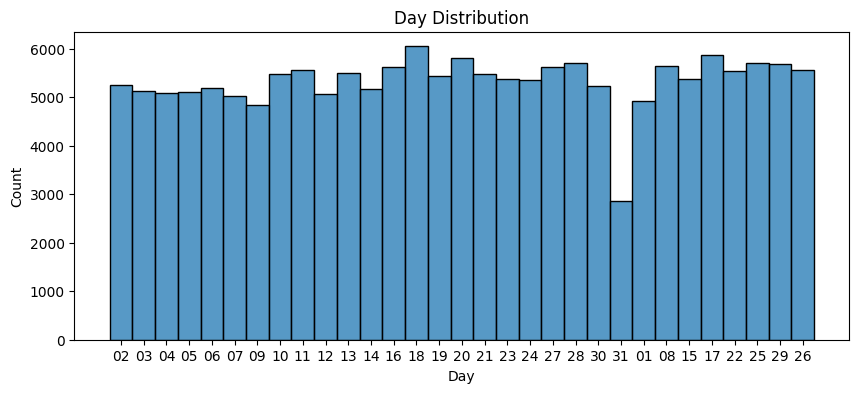

In [ ]:
plt.figure(figsize= (10, 4))
sns.histplot(day_list)
plt.title('Day Distribution')
plt.xlabel('Day')

##More  Preprocessing Steps

####hazm is a library for preprocessing  Persion texts

In [ ]:
import hazm
from hazm import *

tokenizer = WordTokenizer()
normalizer = Normalizer()


###Tokenization

In [ ]:
def token(passage):
  token_lis = tokenizer.tokenize(passage)
  return token_lis

df2['tokens']  = df2['Content'].apply(token)

##Normalization

In [ ]:
def normal(passage):
  normal = normalizer.normalize(passage)
  return normal

df2['nomalized'] = df2['Content'].apply(normal)

In [ ]:
df2.head(2)

,Date,Category,Content,nomalized
0,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...,جاودانگی در زندگی گروهی از طریق هنر نگاهی به ن...
1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...,رویدادهای هنری جهان نمایشگاه هنر در خدمت دیکتا...


###Stop Word Removal


In [ ]:
from hazm.utils import stopwords_list
stop_lis = stopwords_list()

def stop_words(tokens):
  return [i for i in tokens if i not in stop_lis ]

# for i in df2['tokens']:
#   if i not in stop_lis:
#     df2['without_stop'] = i
df2['without_stop'] = df2['Content'].apply(stop_words)

In [ ]:
df2.head(3)

,Date,Category,Content,tokens,nomalized,without_stop
0,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...,"[جاودانگي, در, زندگي, گروهي, از, طريق, هنر, نگ...",جاودانگی در زندگی گروهی از طریق هنر نگاهی به ن...,"[جاودانگي, زندگي, گروهي, طريق, هنر, نگاهي, نما..."
1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...,"[رويدادهاي, هنري, جهان, نمايشگاه, هنر, در, خدم...",رویدادهای هنری جهان نمایشگاه هنر در خدمت دیکتا...,"[رويدادهاي, هنري, جهان, نمايشگاه, هنر, خدمت, د..."
2,75\04\02,adabh,برديوار نگارخانه ها گالري گلستان: نمايشگاه ط...,"[برديوار, نگارخانه, ها, گالري, گلستان, :, نماي...",بردیوار نگارخانه‌ها گالری گلستان: نمایشگاه طرح...,"[برديوار, نگارخانه, ها, گالري, گلستان, :, نماي..."


#TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from hazm import *


In [ ]:
df2['O_content'] = df2['without_stop'].apply(' '.join)

###O_content is content witout stop words

In [ ]:
df2.head(2)

,Date,Category,Content,tokens,nomalized,without_stop,O_content
0,75\04\02,adabh,جاودانگي در زندگي گروهي از طريق هنر نگاهي به ...,"[جاودانگي, در, زندگي, گروهي, از, طريق, هنر, نگ...",جاودانگی در زندگی گروهی از طریق هنر نگاهی به ن...,"[جاودانگي, زندگي, گروهي, طريق, هنر, نگاهي, نما...",جاودانگي زندگي گروهي طريق هنر نگاهي نمايشگاه آ...
1,75\04\02,adabh,رويدادهاي هنري جهان نمايشگاه هنر در خدمت ديكت...,"[رويدادهاي, هنري, جهان, نمايشگاه, هنر, در, خدم...",رویدادهای هنری جهان نمایشگاه هنر در خدمت دیکتا...,"[رويدادهاي, هنري, جهان, نمايشگاه, هنر, خدمت, د...",رويدادهاي هنري جهان نمايشگاه هنر خدمت ديكتاتور...


In [ ]:
vectorizer = TfidfVectorizer()
corpus = df2['nomalized']
vectores = vectorizer.fit_transform(corpus)

In [ ]:
# corpus2 = df2['O_content']
# vectores2 = vectorizer.fit_transform(corpus2)

In [ ]:
feature_names = vectorizer.get_feature_names_out()

In [ ]:
sorted_vectores = vectores.mean(axis= 1).A1.argsort()

In [ ]:
for i in sorted_vectores[-5:]:
    print(feature_names[i])

اگرایران
امیرملاحی
آئورینو
ازماندلا
تاکمبود


In [ ]:

# matrix = vectores.todense()

# list_dense = matrix.tolist()
# df = pd.DataFrame(list_dense, columns= feature_names)

In [ ]:
# total_tfidf_scores = vectores.sum(axis=0)


# total_tfidf_scores = np.array(total_tfidf_scores).reshape(-1)

# sorted_indices = total_tfidf_scores.argsort()[::-1]

# feature_names = np.array(feature_names)

# most_important_word = feature_names[sorted_indices[0]]